In [1]:
import os
import pandas as pd
import nltk
pd.set_option('display.max_colwidth', 200) # set max number of characters can see in pd dataframe

In [2]:
apple_news_df = pd.read_pickle("./data/apple_news.pkl")
apple_news_df = apple_news_df.rename(columns={"date": "full_long_date_format"})
apple_news_df.head()

,full_long_date_format,headline,text,url
38,"Fri Apr 5, 2013 3:52pm EDT",Hedge fund manager Ackman says mistakes made in JCPenney turnaround,"BOSTON (Reuters) - Hedge fund manager William Ackman said that Ron Johnson, the chief executive he handpicked to turn around JC Penney, has made ""big mistakes"" and the impact on the struggling r...",http://www.reuters.com/article/2013/04/05/us-hedgefunds-ackman-jcpenney-idUSBRE9340MS20130405
155,"Tue Nov 13, 2012 4:41am EST",Microsoft and Google financials could surface at trial,(Reuters) - Microsoft and Google's Motorola Mobility unit are set to square off on Tuesday at a trial with strategic implications for the smartphone patent wars and which could reveal financial i...,http://www.reuters.com/article/2012/11/13/us-microsoft-google-trial-idUSBRE8AC08920121113
189,"Tue Nov 13, 2012 8:32am EST","Microsoft's Windows head, once a possible CEO, exits",SEATTLE (Reuters) - The executive most widely tipped to be the next chief executive of Microsoft Corp has left the world's largest software maker barely two weeks after launching the flagship Wi...,http://www.reuters.com/article/2012/11/13/us-microsoft-windows-sinofsky-idUSBRE8AC02Z20121113
283,"Tue Feb 7, 2012 5:33pm EST",Wall St edges up in quiet day; Disney down late,"NEW YORK (Reuters) - Stock index futures pointed to a slightly higher open for equities on Wall Street on Wednesday, with futures for the S&P 500, the Dow Jones and the Nasdaq 100 rising 0.2 to ...",http://www.reuters.com/article/2012/02/07/us-markets-stocks-idUSTRE80T0J120120207
432,"Mon Jun 9, 2008 9:28pm EDT",iPhone to cut into AT&T earnings until 2010,NEW YORK (Reuters) - AT&T Inc will suffer lower earnings this year and next year as it plans to subsidize the price of the latest iPhone from Apple Inc in a bet it can help it boost data service...,http://www.reuters.com/article/2008/06/10/us-apple-iphone-att-idUSN0926011020080610


In [3]:
from time import strptime
from datetime import datetime

s = "Fri Apr 5, 2013 3:52pm EDT"
s = s.replace(',', '')

date = s.split()[1:5]
month = strptime(date[0],'%b').tm_mon

date

['Apr', '5', '2013', '3:52pm']

In [4]:
x = datetime(int(date[2]), int(month), int(date[1]))
date_format = x.strftime("%Y-%m-%d")
date_format

'2013-04-05'

In [5]:
def cleanup_date_format(x):
    x = x.replace(',', '')
    date = x.split()[1:5]
    month = strptime(date[0],'%b').tm_mon
    x = datetime(int(date[2]), int(month), int(date[1]))
    date_format = x.strftime("%Y-%m-%d")
    return date_format

In [6]:
apple_news_df['Date'] = apple_news_df['full_long_date_format'].apply(lambda x: cleanup_date_format(x))
apple_news_df = apple_news_df.drop(columns=["url", "full_long_date_format"])
apple_news_df = apple_news_df.set_index('Date') # set date as index of the dataframe
apple_news_df.head()

,headline,text
Date,,
2013-04-05,Hedge fund manager Ackman says mistakes made in JCPenney turnaround,"BOSTON (Reuters) - Hedge fund manager William Ackman said that Ron Johnson, the chief executive he handpicked to turn around JC Penney, has made ""big mistakes"" and the impact on the struggling r..."
2012-11-13,Microsoft and Google financials could surface at trial,(Reuters) - Microsoft and Google's Motorola Mobility unit are set to square off on Tuesday at a trial with strategic implications for the smartphone patent wars and which could reveal financial i...
2012-11-13,"Microsoft's Windows head, once a possible CEO, exits",SEATTLE (Reuters) - The executive most widely tipped to be the next chief executive of Microsoft Corp has left the world's largest software maker barely two weeks after launching the flagship Wi...
2012-02-07,Wall St edges up in quiet day; Disney down late,"NEW YORK (Reuters) - Stock index futures pointed to a slightly higher open for equities on Wall Street on Wednesday, with futures for the S&P 500, the Dow Jones and the Nasdaq 100 rising 0.2 to ..."
2008-06-09,iPhone to cut into AT&T earnings until 2010,NEW YORK (Reuters) - AT&T Inc will suffer lower earnings this year and next year as it plans to subsidize the price of the latest iPhone from Apple Inc in a bet it can help it boost data service...


In [7]:
apple_OHLCV = pd.read_csv('data/AAPL.csv') 
apple_OHLCV = apple_OHLCV.set_index('Date') # set date as index of the dataframe
apple_OHLCV.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-09-12,666.85,669.90,656.00,669.79,25410600,669.79
2012-09-11,665.11,670.10,656.50,660.59,17987400,660.59
2012-09-10,680.45,683.29,662.10,662.74,17428500,662.74
2012-09-07,678.05,682.48,675.77,680.44,11773800,680.44
2012-09-06,673.17,678.29,670.80,676.27,13971300,676.27


In [8]:
p = apple_news_df.iloc[0:5]
apple_news_df['label'] = 0
for i, row in apple_news_df.iterrows():
#     print(row['headline'])
    
    try:
        opening_price = apple_OHLCV.loc[i]['Open']
        closing_price = apple_OHLCV.loc[i]['Adj Close']
        sentiment = 1
        if opening_price > closing_price:
            sentiment = 0
        apple_news_df = apple_news_df.set_value(i,'label',sentiment)
    except:
        pass
#         print('Could not find closing price for this date ' + i)
    
# p.head()
apple_news_df.head(25)

/Users/alex/Desktop/NLP/NewsSentimentAnalysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


,headline,text,label
Date,,,
2013-04-05,Hedge fund manager Ackman says mistakes made in JCPenney turnaround,"BOSTON (Reuters) - Hedge fund manager William Ackman said that Ron Johnson, the chief executive he handpicked to turn around JC Penney, has made ""big mistakes"" and the impact on the struggling r...",0
2012-11-13,Microsoft and Google financials could surface at trial,(Reuters) - Microsoft and Google's Motorola Mobility unit are set to square off on Tuesday at a trial with strategic implications for the smartphone patent wars and which could reveal financial i...,0
2012-11-13,"Microsoft's Windows head, once a possible CEO, exits",SEATTLE (Reuters) - The executive most widely tipped to be the next chief executive of Microsoft Corp has left the world's largest software maker barely two weeks after launching the flagship Wi...,0
2012-02-07,Wall St edges up in quiet day; Disney down late,"NEW YORK (Reuters) - Stock index futures pointed to a slightly higher open for equities on Wall Street on Wednesday, with futures for the S&P 500, the Dow Jones and the Nasdaq 100 rising 0.2 to ...",1
2008-06-09,iPhone to cut into AT&T earnings until 2010,NEW YORK (Reuters) - AT&T Inc will suffer lower earnings this year and next year as it plans to subsidize the price of the latest iPhone from Apple Inc in a bet it can help it boost data service...,0
2008-06-10,Verizon says FiOS buildout may exceed plans,NEW YORK (Reuters) - Verizon Communication Inc ( VZ.N ) said on Tuesday it could build out its all-fiber Internet and video network to more than its target of 18 million homes by the end of 2010...,1
2008-06-09,Softbank to sell new iPhone from July; shares up,"TOKYO (Reuters) - Softbank Corp, Japan's third-biggest mobile phone operator, plans to start selling Apple Inc's new iPhone in Japan from July, an earlier launch date than expected and one that ...",0
2008-06-10,HP aims to transform market with touchy-feely PCs,"BERLIN (Reuters) - Hewlett-Packard, the world's biggest computer maker, launched a new generation of PCs on Tuesday that respond to users tapping or stroking the screen, potentially bringing use...",1
2008-06-10,"Apple takes wraps off ""zippy"" iPhone",SAN FRANCISCO (Reuters) - Apple Inc on Monday unveiled a next-generation iPhone with faster Internet access that will run on advanced wireless networks and sell for as low as $199 -- half the cu...,1


In [9]:
# What is the shape of this datataset
print("Input data has {} rows and {} columns".format(len(apple_news_df), len(apple_news_df.columns)))

Input data has 3011 rows and 3 columns


In [10]:
# How many revies are negative and positive?

print("Out of {} rows, {} are negative, {} are positive".format(len(apple_news_df), 
                                                       len(apple_news_df[apple_news_df['label']==0]), 
                                                       len(apple_news_df[apple_news_df['label']==1])))

Out of 3011 rows, 2145 are negative, 866 are positive


In [11]:
# Is there any missing data?
print("Number of null in label: {}".format(apple_news_df['label'].isnull().sum()))
print("Number of null in headline: {}".format(apple_news_df['headline'].isnull().sum()))
print("Number of null in text: {}".format(apple_news_df['text'].isnull().sum()))

Number of null in label: 0
Number of null in headline: 0
Number of null in text: 0


In [12]:
data = apple_news_df.sample(frac=1).reset_index(drop=True)
data.head()

,headline,text,label
0,"Instant View: Morgan Stanley, Wells Fargo Q2 earnings","NEW YORK (Reuters) - Morgan Stanley ( MS.N ) reported a second-quarter profit on Wednesday, beating analyst estimates, despite weak industry trends. The New York bank reported second-quarter adj...",0
1,Apple shares slip as light outlook disappoints,"NEW YORK Jan 18 (Reuters) - Shares of Apple Inc. ( AAPL.O ) fell 3.6 percent in early trading on Thursday, a day after the maker of Macintosh computers and iPod digital music players delivered f...",0
2,"Apple posts options expenses, stands by CEO Jobs",BOSTON/NEW YORK (Reuters) - Apple Computer Inc. ( AAPL.O ) Chief Executive Steve Jobs received a vote of confidence from the company's board on Friday in a much anticipated filing that also said...,1
3,Vivendi Chief says Universal will keep artists,NEW YORK (Reuters) - Vivendi ( VIV.PA ) Chief Executive Jean-Bernard Levy said on Tuesday its Universal Music Group unit will succeed in keeping its big-name artists even though he is not surpri...,1
4,STMicro says may need $500 million to leave ST-Ericsson,"SAN FRANCISCO/PARIS (Reuters) - STMicroelectronics ( STM.PA ) could need as much as $500 million to get out of its loss-making joint venture with Ericsson ( ERICb.ST ), compounding the chipmaker...",0


In [13]:

# Data Pre-processing
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2)

In [15]:
# Vectorizing data
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train)

tfidf_train = tfidf_vect_fit.transform(X_train)
tfidf_test = tfidf_vect_fit.transform(X_test)

In [16]:
X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())

In [17]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.layers import LSTM

input_dim = X_train_vect.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

/Users/alex/Desktop/NLP/NewsSentimentAnalysis/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/alex/Desktop/NLP/NewsSentimentAnalysis/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/alex/Desktop/NLP/NewsSentimentAnalysis/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                294640    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 294,651
Trainable params: 294,651
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train_vect, y_train,
                     epochs=100,
                     verbose=False,
                     validation_data=(X_test_vect, y_test))

In [19]:
from tensorflow.python.keras.models import load_model

if not os.path.exists('data/model.h5'):
    model.save('data/model.h5')  # creates a HDF5 file 'my_model.h5'
    print("Saved model to disk")

# load weights into new model
# returns a compiled model
# identical to the previous one
model = load_model('data/model.h5')

W0805 22:36:24.998934 140735975318400 deprecation.py:506] From /Users/alex/Desktop/NLP/NewsSentimentAnalysis/env/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0805 22:36:24.999719 140735975318400 deprecation.py:506] From /Users/alex/Desktop/NLP/NewsSentimentAnalysis/env/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Saved model to disk


In [20]:
loss, accuracy = model.evaluate(X_train_vect, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_vect, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9884
Testing Accuracy:  0.7148


In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

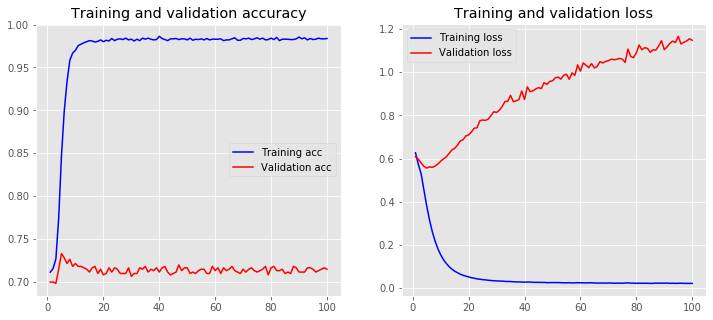

In [22]:
plot_history(history)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train_vect, y_train)
y_pred = rf_model.predict(X_test_vect)

loss, accuracy = model.evaluate(X_train_vect, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_vect, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9884
Testing Accuracy:  0.7148


In [37]:
import numpy as np
x = ['March 15 (Reuters) - Mobile phone chip supplier Qualcomm Inc on Friday won a court victory against iPhone maker Apple Inc, with a jury in federal court in San Diego finding that Apple infringed on three of Qualcomm’s patents, a Qualcomm spokeswoman told Reuters. (Reporting by Stephen Nellis; Editing by Richard Chang)']

vectorizer = TfidfVectorizer(analyzer=clean_text)
vectorizer = vectorizer.fit(x)

tfidf_train = tfidf_vect_fit.transform(x)
x = pd.DataFrame(tfidf_train.toarray())

print(rf_model.predict(x))

[0]
